TF version: 2.11.0
170498071/170498071 [==============================] - 229s 1us/step


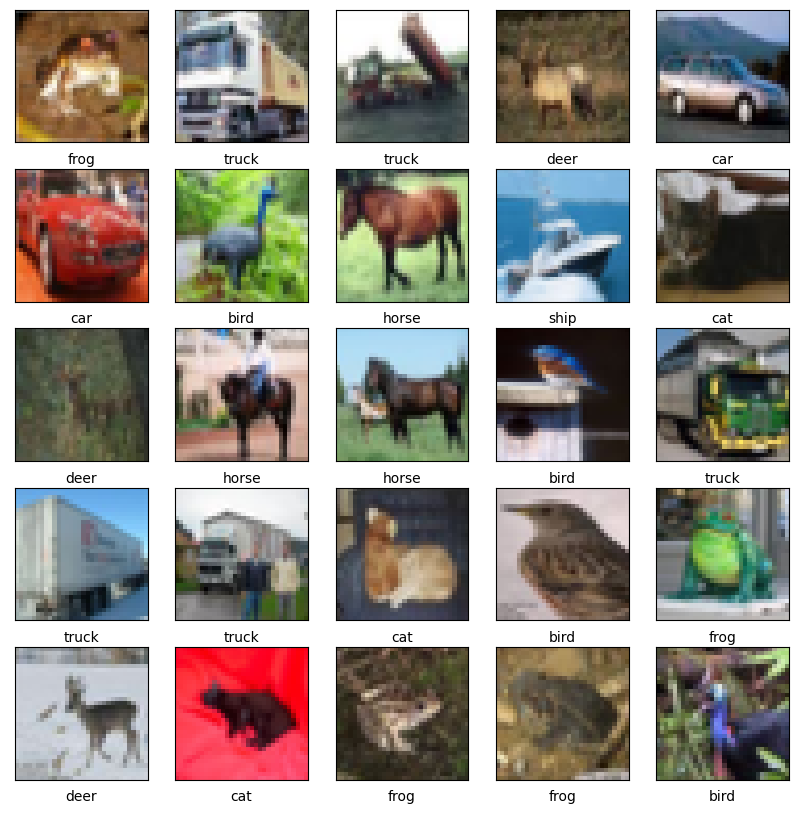

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

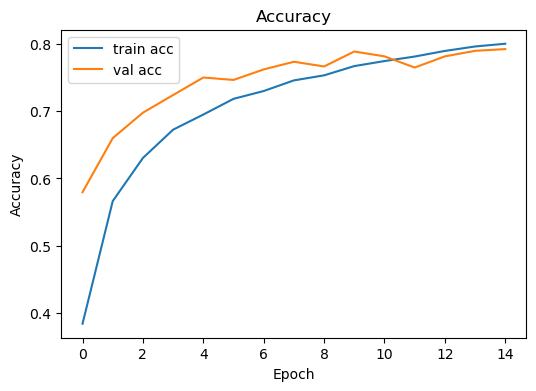

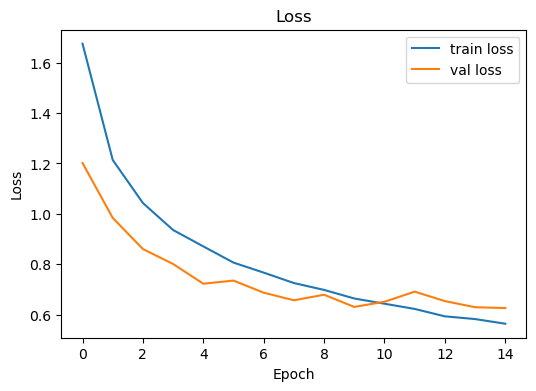

1/1 [==============================] - 0s 176ms/step
Predicted labels: [3 8 8 8 6 6 1 4]
True labels     : [3 8 8 0 6 6 1 6]


In [1]:
# --- Imports ---
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

print("TF version:", tf.__version__)

# --- Data ---
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Scale to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# --- Model ---
def make_cnn(input_shape=(32, 32, 3), classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(classes, activation="softmax"),
    ])
    return model

model = make_cnn()
model.summary()

# --- Compile ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",   # labels are integers
    metrics=["accuracy"]
)

# --- Train ---
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=1
)

# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

# --- Plot learning curves ---
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy")

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss")
plt.show()

# --- Predict a few samples ---
pred_probs = model.predict(x_test[:8])
pred_labels = pred_probs.argmax(axis=1).flatten()
print("Predicted labels:", pred_labels)
print("True labels     :", y_test[:8].flatten())

1/1 [==============================] - 0s 24ms/step


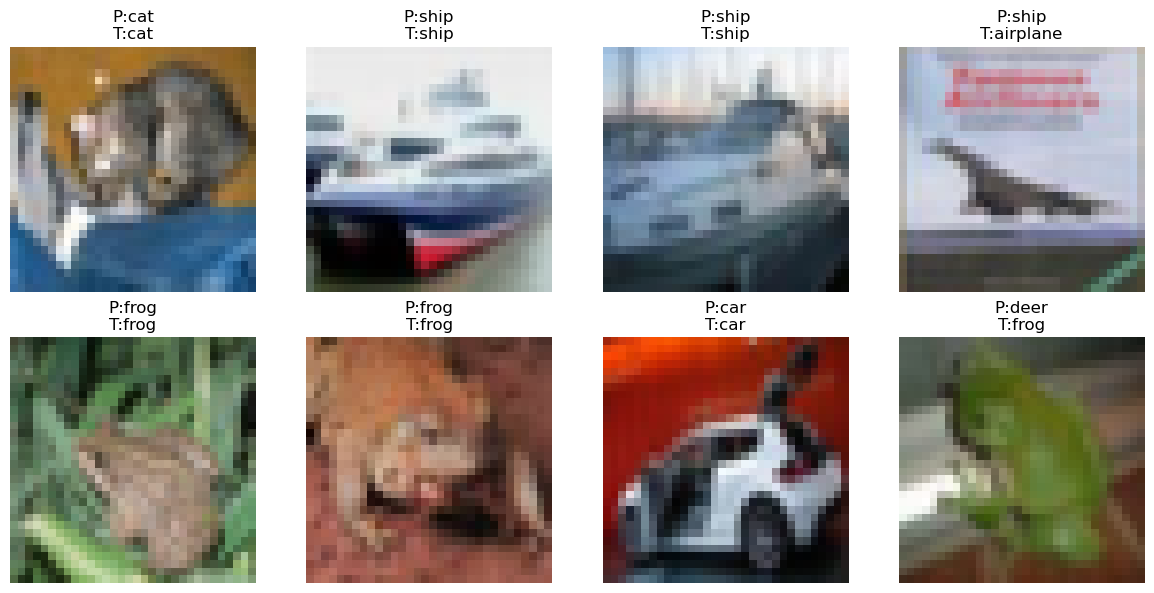

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ["airplane", "car", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Get predictions for first 8 test images
pred_probs = model.predict(x_test[:8])
pred_labels = pred_probs.argmax(axis=1).flatten()
true_labels = y_test[:8].flatten()

# Plot the images with labels
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i])
    plt.axis("off")
    plt.title(f"P:{class_names[pred_labels[i]]}\nT:{class_names[true_labels[i]]}")

plt.tight_layout()
plt.show()
